https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
temps = pd.read_csv('data/temps.csv')

df_temps2 = pd.DataFrame(temps)

In [27]:
df_temps2

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [28]:
df_temps2.keys()
df_temps2.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

### 2. Lidia con las variables categóricas del dataset

In [29]:
df_temps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [16]:
dias ={'Mon':0, 'Tues': 1, 'Wed':2, 'Thurs':3, 'Fri':4, 'Sat':5, 'Sun':6} 

In [30]:
df_temps2['week'] = df_temps2['week'].map(dias)
df_temps2

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [37]:
df_temps2.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

### 3. Divide en train y test

In [39]:
X = df_temps2[['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend']]
y = df_temps2['actual']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (278, 11)	y_train: (278,)
X_test: (70, 11)	y_test: (70,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
tree = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=20)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, random_state=0)

In [54]:
y_hat = tree.predict(X_test)

In [55]:
y_hat_train = tree.predict(X_train)

### 5. Calcula su MAE
Sin usar sklearn

In [56]:
def mae_hm(y_test, y_hat):
    return np.mean(np.abs(y_test - y_hat))

print(f"MAE Train: {mae_hm(y_train, y_hat_train):.2f}")
print(f"MAE Test: {mae_hm(y_test, y_hat):.2f}")

MAE Train: 3.73
MAE Test: 3.97


### 6. Calcula su MAPE
Sin usar sklearn

In [61]:
def MAPE(y_test , y_hat):
    mape = np.mean(np.abs((y_test- y_hat)/y_test))*100
    return mape

print(MAPE(y_test, y_hat))

6.383420754611648


In [62]:
def MAPE2(y_train , y_hat_train):
    mape = np.mean(np.abs((y_train- y_hat_train)/y_train))*100
    return mape

print(MAPE2(y_train, y_hat_train))

6.0740197418731645


### 7. Representa el árbol de decision

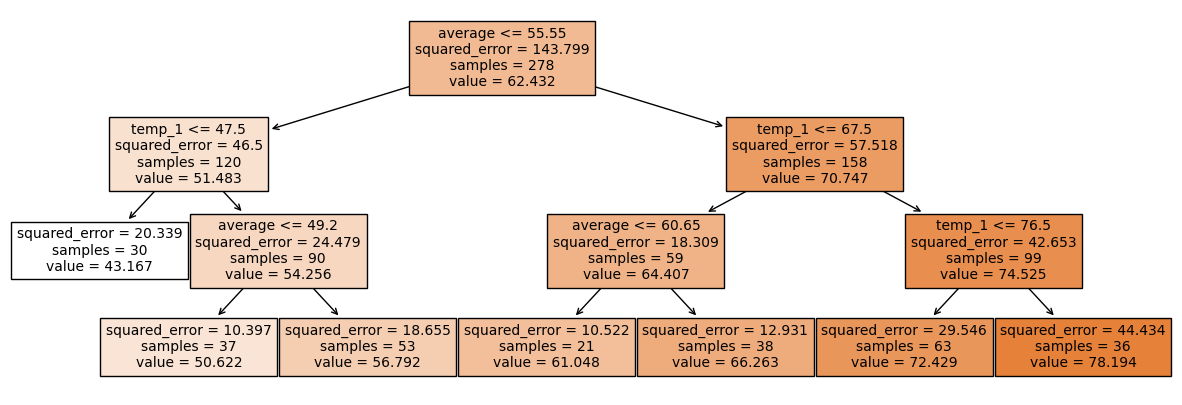

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(tree,
               feature_names=X_train.columns,
               
               filled = True,
               fontsize=10);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [64]:
tree = DecisionTreeRegressor(max_depth=2, random_state=0, min_samples_leaf=20)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=0)

In [65]:
y_hat2 = tree.predict(X_test)
y_hat2_train = tree.predict(X_train)

### 9. Vuelve a calcular si MAE

In [67]:
def mae_hm(y_test, y_hat2):
    return np.mean(np.abs(y_test - y_hat2))

print(f"MAE Train: {mae_hm(y_train, y_hat2_train):.2f}")
print(f"MAE Test: {mae_hm(y_test, y_hat2):.2f}")

MAE Train: 4.27
MAE Test: 4.50


### 10. Vuelve a representar su árbol

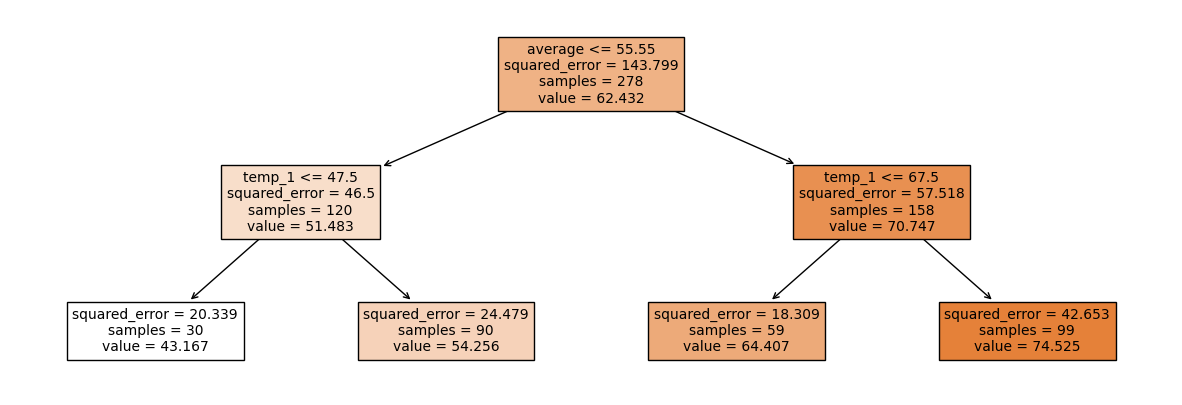

In [68]:

plt.figure(figsize=(15,5))
plot_tree(tree,
               feature_names=X_train.columns,
               
               filled = True,
               fontsize=10);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [69]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20563809, 0.79436191, 0.        , 0.        , 0.        ,
       0.        ])

<AxesSubplot:ylabel='variable'>

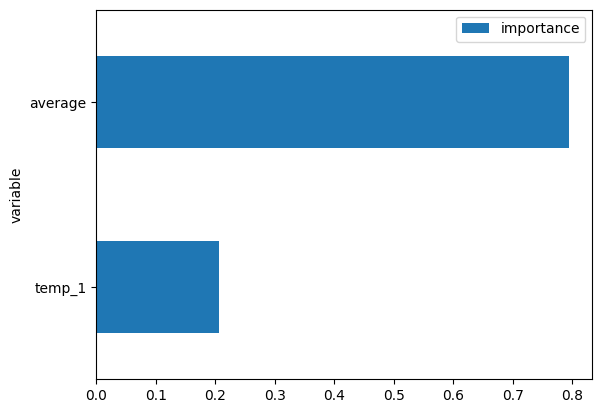

In [71]:
imp_nonz = X_train.iloc[:, np.where(tree.feature_importances_ != 0)[0]].columns
importances = tree.feature_importances_[tree.feature_importances_ != 0]

df_imp = pd.DataFrame({'variable': imp_nonz, 'importance': importances})
df_imp.set_index('variable', inplace=True)
df_imp.sort_values(by='importance').plot(kind='barh')